In [35]:
%config Completer.use_jedi = False
from snha4py.Snha import Snha                                                                    
import matplotlib.pyplot as plt                                                                  
import pandas as pd  

In [36]:
data = pd.read_csv('decathlon.tab', sep='\t') #load data
data.head()

,100,long,poid,haut,400,110,disq,perc,jave,1500
1,11.25,7.43,15.48,2.27,48.90,15.13,49.28,4.7,61.32,268.95
2,10.87,7.45,14.97,1.97,47.71,14.46,44.36,5.1,61.76,273.02
3,11.18,7.44,14.20,1.97,48.29,14.81,43.66,5.2,64.16,263.20
4,10.62,7.38,15.02,2.03,49.06,14.72,44.80,4.9,64.04,285.11
5,11.02,7.43,12.92,1.97,47.44,14.40,41.20,5.2,57.46,256.64


## Revise the running events
Change the time into speed for the running distances 100, 400, 1500 and 110m hurdling, to be comparable with the other events. Here, highest is best, while for running events the lowest would be best. 

In [37]:
data = pd.read_csv('decathlon.tab', sep='\t')
dist = [100,110,400,1500]

for d in dist:
    data[str(d)] = d/data[str(d)]
data = data.rename(columns={'poid':'shot', 'haut': 'high', 'perc':'pole'})
cols_re = [str(d) for d in dist]
for c in data.columns:
    if not c in cols_re:
        cols_re.append(c)
data = data[cols_re]
data.head()

,100,110,400,1500,long,shot,high,disq,pole,jave
1,8.888889,7.270324,8.179959,5.577245,7.43,15.48,2.27,49.28,4.7,61.32
2,9.199632,7.607192,8.383987,5.494103,7.45,14.97,1.97,44.36,5.1,61.76
3,8.944544,7.427414,8.283288,5.699088,7.44,14.20,1.97,43.66,5.2,64.16
4,9.416196,7.472826,8.153282,5.261127,7.38,15.02,2.03,44.80,4.9,64.04
5,9.074410,7.638889,8.431703,5.844763,7.43,12.92,1.97,41.20,5.2,57.46


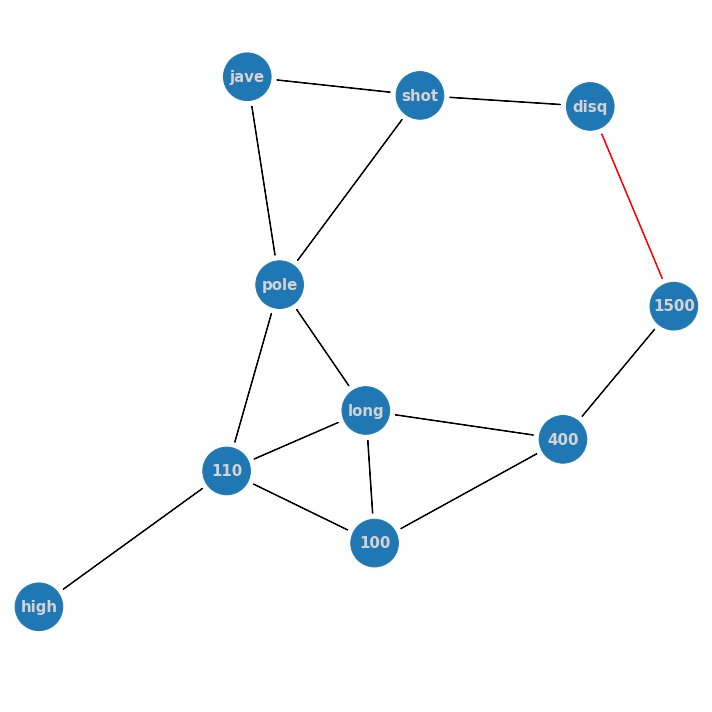

In [38]:
s = Snha(data=data)
s.comp_corr(method='spearman')
s.st_nich_alg()
s.plot_graph()

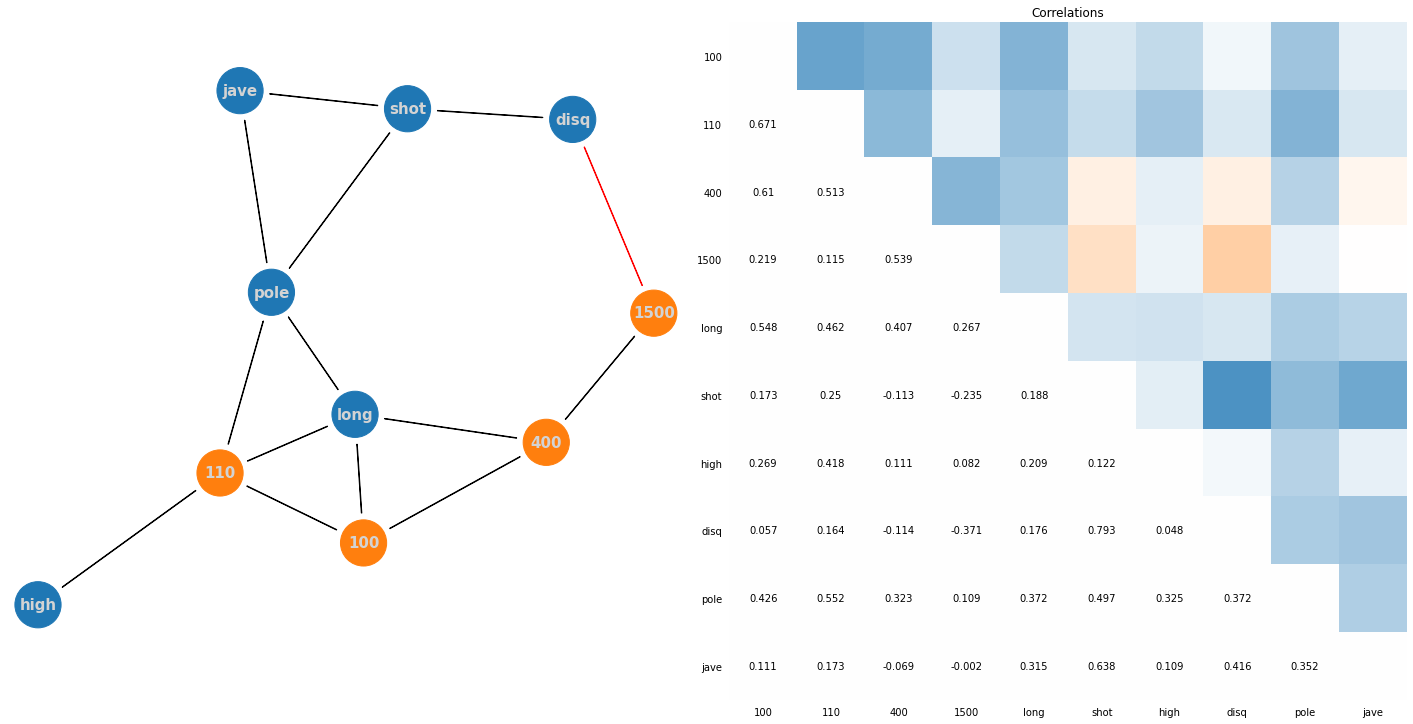

In [39]:
cols = 4*['tab:orange']+6*['tab:blue']+['red']

fig, ax = plt.subplots(1,2,figsize=(20,10))
s.plot_graph(ax=ax[0],col=cols)
s.plot_corr(ax=ax[1])
plt.show()

## Insert a random variable
Now a column is shuffeld and appended again to the data set. This variable is not correlated to the other variables due to shuffeling. It appears in the graph as a node, which is not connected to the other nodes.

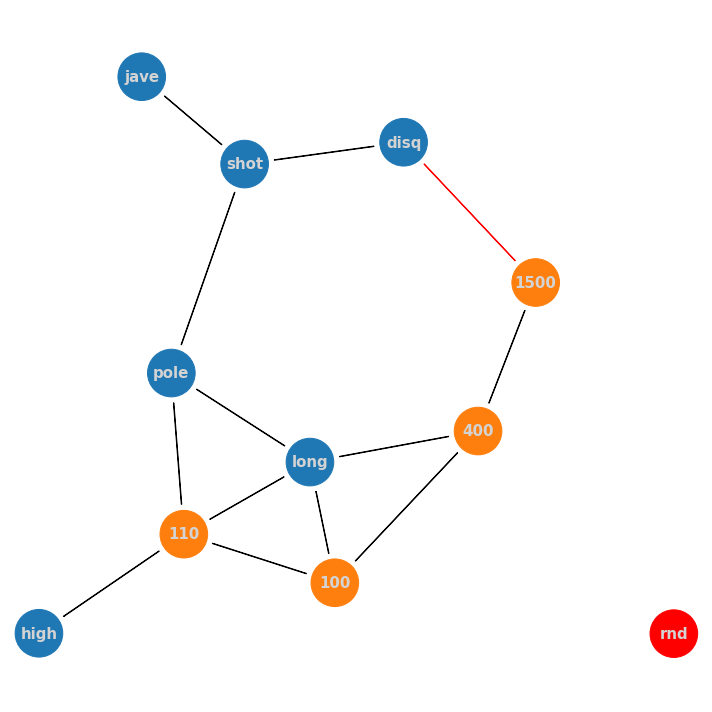

In [43]:
data['rnd'] = data['100'].sample(n=data.shape[0], ignore_index=True)
s = Snha(data=data)
s.comp_corr(method='spearman')
s.st_nich_alg()
s.plot_graph(col=cols)